In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [ ]:
#url = 'https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson'
#url = 'https://raw.githubusercontent.com/yandunmarco/mapa_tulcan/main/yandunmarco-map_Tulcan_DOS.geojson'
url = 'https://raw.githubusercontent.com/yandunmarco/mapa_tulcan/main/Centros_vacunacion_Carchi2.geojson'
#url='https://raw.githubusercontent.com/yandunmarco/mapa_tulcan/main/yandunmarco-map-4.geojson'

In [ ]:
region_geojson = gpd.read_file(url)
region_geojson.head(10)

,ZONACIUDAD,FIRST_IDDP,geometry
0,Centro_Vacunacion_Tulcan_Norte_uno,01,"POLYGON ((-77.71124 0.81799, -77.70835 0.81448..."
1,Centro_Vacunacion_Tulcan_Norte_dos,02,"POLYGON ((-77.69450 0.83403, -77.69610 0.83254..."
2,Centro_Vacunacion_Tulcan_Centro,03,"POLYGON ((-77.70792 0.81044, -77.70835 0.81209..."
3,Centro_Vacunacion_Tulcan_Sur_uno,04,"POLYGON ((-77.74035 0.77496, -77.74079 0.77570..."
4,Centro_Vacunacion_Tulcan_Sur_dos,05,"POLYGON ((-77.74398 0.78799, -77.74314 0.79018..."
5,Centro_Salud_Bolivar,06,"POLYGON ((-77.88848 0.51184, -77.88875 0.48550..."
6,Centro_Vacunacion_Caldera,07,"POLYGON ((-77.81848 0.36206, -77.87469 0.39991..."
7,Centro_Vacunacion_Chical,08,"POLYGON ((-78.18490 0.93721, -78.18839 0.94107..."
8,Centro_Vacunacion_Chitan_de_Navarretes,09,"POLYGON ((-77.79738 0.61953, -77.79272 0.61710..."
9,Centro_Vacunacion_El_Carmelo,10,"POLYGON ((-77.60145 0.67509, -77.60027 0.67507..."


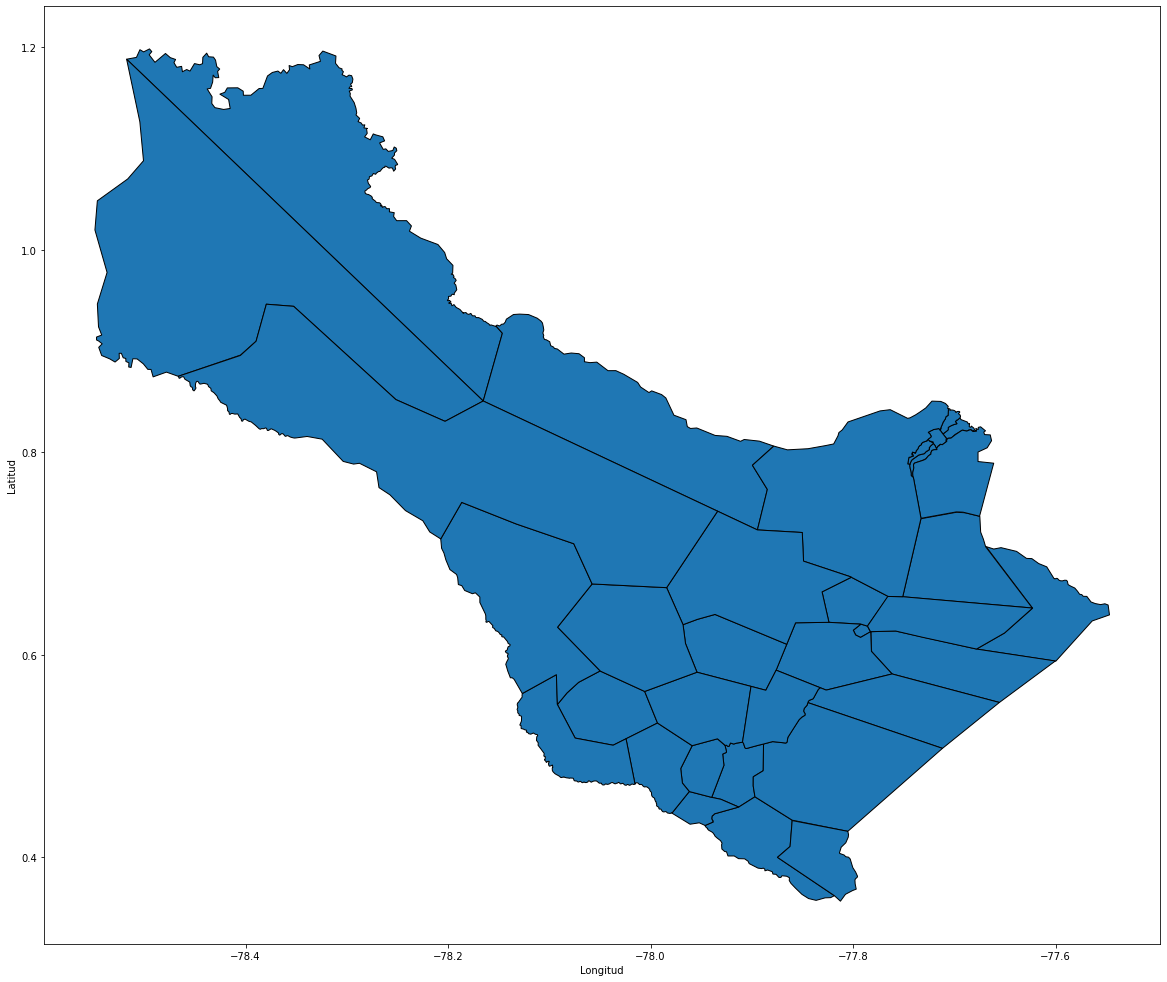

In [ ]:
region_geojson.plot(figsize=(20,20), edgecolor='black')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
regiones = list(region_geojson.ZONACIUDAD.values)
print(regiones)

['Centro_Vacunacion_Tulcan_Norte_uno', 'Centro_Vacunacion_Tulcan_Norte_dos', 'Centro_Vacunacion_Tulcan_Centro', 'Centro_Vacunacion_Tulcan_Sur_uno', 'Centro_Vacunacion_Tulcan_Sur_dos', 'Centro_Salud_Bolivar', 'Centro_Vacunacion_Caldera', 'Centro_Vacunacion_Chical', 'Centro_Vacunacion_Chitan_de_Navarretes', 'Centro_Vacunacion_El_Carmelo', 'Centro_Vacunacion_Julio_Andrade', 'Centro_Vacunacion_Urbina', 'Centro_Vacunacion_Pioter', 'Centro_Vacunacion_Fernandez_Salvador', 'Centro_Vacunacion_San_Gabriel', 'Centro_Vacunacion_Huaca', 'Centro_Vacunacion_Canchaguano', 'Centro_Vacunacion_La_Paz', 'Centro_Vacunacion_Piquicho', 'Centro_Vacunacion_Monte_Olivo', 'Centro_Vacunacion_Maldonado', 'Centro_Vacunacion_Tufino', 'Centro_Vacunacion_Tobar_Donoso', 'Centro_Vacunacion_Los_Andes', 'Centro_Vacunacion_Mira', 'Centro_Vacunacion_Pusis_Grande', 'Centro_Vacunacion_San_Vicente_Pusir', 'Centro_Vacunacion_El_Angel', 'Centro_Vacunacion_Garcia_Moreno', 'Centro_Vacunacion_Cuesaca', 'Centro_Vacunacion_La_liberta

In [ ]:
#lista de adyacencia de regiones en orden alfabético
grafo_regional = [[1,2],[0,2],[0,1,3,4],
                  [2,4],[2,3]]

#grafo_regional = [[1,0]]

for u in range(len(grafo_regional)):
  print(regiones[u],[regiones[v] for v in grafo_regional[u]])

Centro_Vacunacion_Tulcan_Norte_uno ['Centro_Vacunacion_Tulcan_Norte_dos', 'Centro_Vacunacion_Tulcan_Centro']
Centro_Vacunacion_Tulcan_Norte_dos ['Centro_Vacunacion_Tulcan_Norte_uno', 'Centro_Vacunacion_Tulcan_Centro']
Centro_Vacunacion_Tulcan_Centro ['Centro_Vacunacion_Tulcan_Norte_uno', 'Centro_Vacunacion_Tulcan_Norte_dos', 'Centro_Vacunacion_Tulcan_Sur_uno', 'Centro_Vacunacion_Tulcan_Sur_dos']
Centro_Vacunacion_Tulcan_Sur_uno ['Centro_Vacunacion_Tulcan_Centro', 'Centro_Vacunacion_Tulcan_Sur_dos']
Centro_Vacunacion_Tulcan_Sur_dos ['Centro_Vacunacion_Tulcan_Centro', 'Centro_Vacunacion_Tulcan_Sur_uno']


In [ ]:
from ortools.sat.python import cp_model
#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,25,'color_region_'+str(i)) for i in range(len(regiones))]
print(color)
#restricciones
for u in range(len(grafo_regional)): #para cada región u
  for v in grafo_regional[u]: #para cada vecina de u
    model.Add(color[u] != color[v]) #deben tener colores distintos
#solver
solver = cp_model.CpSolver()
status = solver.Solve(model)
c = []
if status == cp_model.OPTIMAL: #si se encuentra una solución
  for u in range(len(grafo_regional)): #para cada región
    print('Región {} ({}) de color {}'.format(u,regiones[u],solver.Value(color[u])))
    c += [solver.Value(color[u])]

[color_region_0(1..25), color_region_1(1..25), color_region_2(1..25), color_region_3(1..25), color_region_4(1..25), color_region_5(1..25), color_region_6(1..25), color_region_7(1..25), color_region_8(1..25), color_region_9(1..25), color_region_10(1..25), color_region_11(1..25), color_region_12(1..25), color_region_13(1..25), color_region_14(1..25), color_region_15(1..25), color_region_16(1..25), color_region_17(1..25), color_region_18(1..25), color_region_19(1..25), color_region_20(1..25), color_region_21(1..25), color_region_22(1..25), color_region_23(1..25), color_region_24(1..25), color_region_25(1..25), color_region_26(1..25), color_region_27(1..25), color_region_28(1..25), color_region_29(1..25), color_region_30(1..25), color_region_31(1..25), color_region_32(1..25), color_region_33(1..25)]
Región 0 (Centro_Vacunacion_Tulcan_Norte_uno) de color 3
Región 1 (Centro_Vacunacion_Tulcan_Norte_dos) de color 1
Región 2 (Centro_Vacunacion_Tulcan_Centro) de color 2
Región 3 (Centro_Vacunaci

In [ ]:
print('Colores de las regiones',c)
print('Cantidad de regiones',len(c))
print('Cantidad de colores de las regiones',len(set(c)),set(c))

Colores de las regiones [3, 1, 2, 3, 4]
Cantidad de regiones 5
Cantidad de colores de las regiones 4 {1, 2, 3, 4}


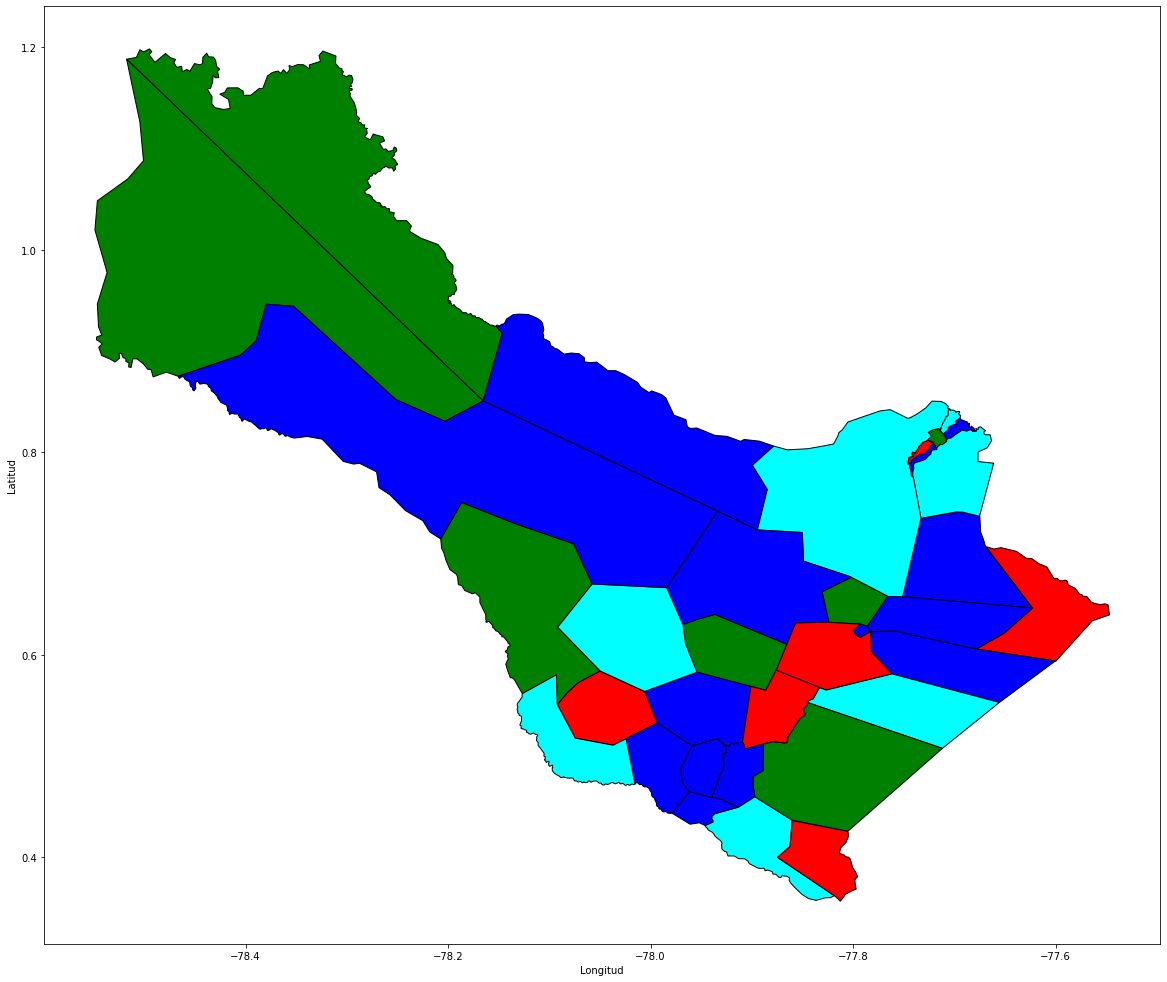

In [ ]:
colors_regiones = ['','cyan','green','blue','red']
#colors_regiones = ['','cyan','green']
from matplotlib.colors import ListedColormap
#crear mapa de color con los indices de colores encontrados por el solver
cmap = ListedColormap([colors_regiones[c[i]] for i in range(5)], name='regions')
#cmap = ListedColormap([colors_regiones[c[i]] for i in range(1)], name='regions')
#plotear el geojson
region_geojson.plot(figsize=(20,20), edgecolor='black', cmap=cmap)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.5 MB 15.0 MB/s 
     |████████████████████████████████| 407 kB 46.3 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.2 which is incompatible.
tensorflow-metadata 1.8.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.2 which is incompatible.
googleapis-common-protos 1.56.2 requires protobuf<4.0.0dev,>=3.15.0, but you have protobuf 4.21.2 which is incompatible.
google-cloud-bigquery-storage 1.1.2 requires protobuf<4.0.0dev, but you have protobuf 4.21.2 wh

In [ ]:
print('Colores de las regiones',c)
print('Cantidad de regiones',len(c))
print('Cantidad de colores de las regiones',len(set(c)),set(c))

Colores de las regiones [3, 1, 2, 3, 4]
Cantidad de regiones 5
Cantidad de colores de las regiones 4 {1, 2, 3, 4}


In [ ]:
colors_regiones = ['','cyan','green','yellow','black']